In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [6]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 4, 26)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

In [8]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-04-21,320.000000,322.000000,308.450012,310.000000,13369014
2025-04-22,312.549988,319.750000,312.100006,319.750000,10027268
2025-04-23,314.950012,316.100006,309.450012,314.149994,8225575
2025-04-24,314.399994,315.850006,312.850006,314.899994,8021180
2025-04-25,306.500000,315.399994,303.399994,313.000000,11475773


In [9]:
df.shape

(4326, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4326 entries, 2007-10-05 to 2025-04-25
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4326 non-null   float64
 1   (High, POWERGRID.NS)    4326 non-null   float64
 2   (Low, POWERGRID.NS)     4326 non-null   float64
 3   (Open, POWERGRID.NS)    4326 non-null   float64
 4   (Volume, POWERGRID.NS)  4326 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 202.8 KB


In [11]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [12]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4326.000000,4326.000000,4326.000000,4326.000000,4.326000e+03
mean,85.389947,86.501357,84.289963,85.425865,1.194025e+07
std,72.035415,72.900685,71.124672,72.016844,2.036828e+07
min,19.001736,20.312200,17.036039,20.213915,0.000000e+00
25%,36.731562,37.286182,36.216705,36.815015,4.875681e+06
50%,62.350979,63.399512,61.059012,62.397769,8.495812e+06
75%,85.362268,86.464689,84.456449,85.449835,1.377628e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [13]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.545418,35.424685,26.900114,29.051477,855215656
1,2007-10-08,30.879333,33.645371,30.685225,33.645371,126671715
2,2007-10-09,32.982166,33.273327,29.229414,30.895505,116725709
3,2007-10-10,33.289497,33.968876,32.998337,33.839469,67931378
4,2007-10-11,37.009895,38.821569,32.998335,38.821569,106320954


In [14]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [15]:
df.to_csv('powergrid.csv')

In [16]:
data01 = pd.read_csv('powergrid.csv')
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.54541778564453,35.42468502551059,26.900113742286507,29.051476675652747,855215656
2,1,2007-10-08,30.87933349609375,33.64537091874948,30.685224759991605,33.64537091874948,126671715
3,2,2007-10-09,32.9821662902832,33.27332717981798,29.229413747593593,30.89550520408466,116725709
4,3,2007-10-10,33.28949737548828,33.96887558934333,32.9983365375293,33.83946906605695,67931378


In [18]:
#Candlesticks

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
                x = data01['Date'],
                open = data01['Open'],
                high = data01['High'],
                low = data01['Low'],
                close = data01['Close'])])

fig.update_layout(title = 'POWERGRID.NS',
                  xaxis_rangeslider_visible = False)
fig.show()

In [20]:
df = df.drop(['Date',], axis = 1)
df.head()

<ipython-input-20-dc3376343525>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.545418,35.424685,26.900114,29.051477,855215656
1,30.879333,33.645371,30.685225,33.645371,126671715
2,32.982166,33.273327,29.229414,30.895505,116725709
3,33.289497,33.968876,32.998337,33.839469,67931378
4,37.009895,38.821569,32.998335,38.821569,106320954


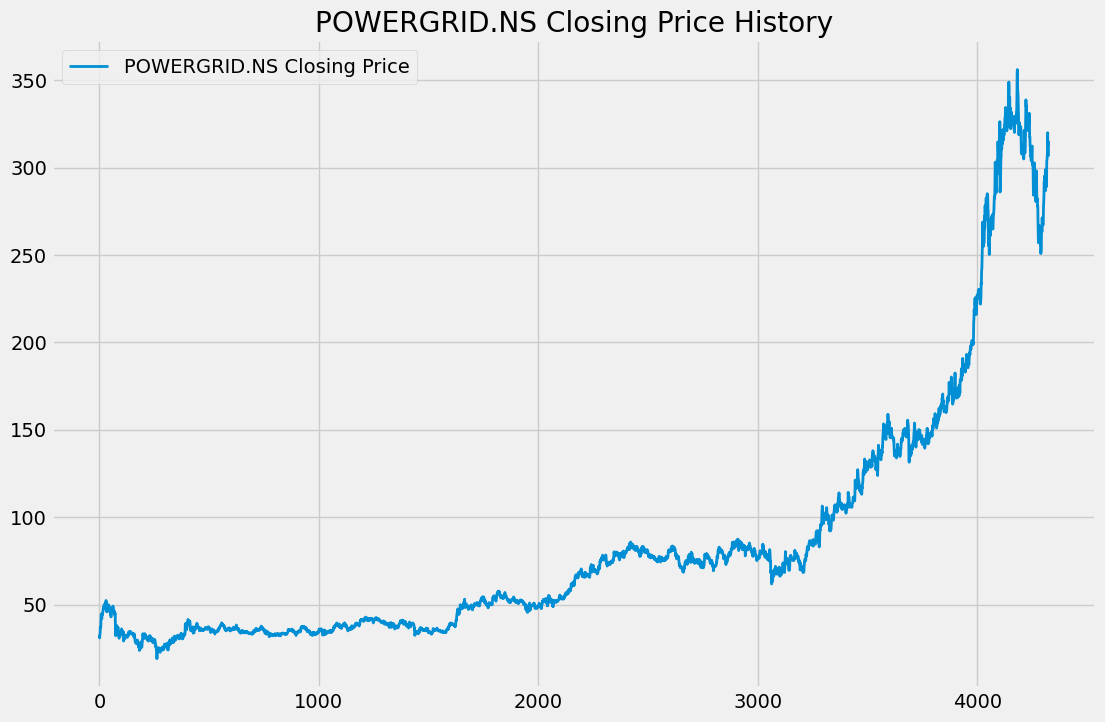

In [24]:
plt.figure(figsize = (12, 8))
plt.title(f'{stock} Closing Price History')
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 2)
#plt.xlabel('Date')
#plt.ylabel('Closing Price USD ($)')
plt.legend()
plt.show()

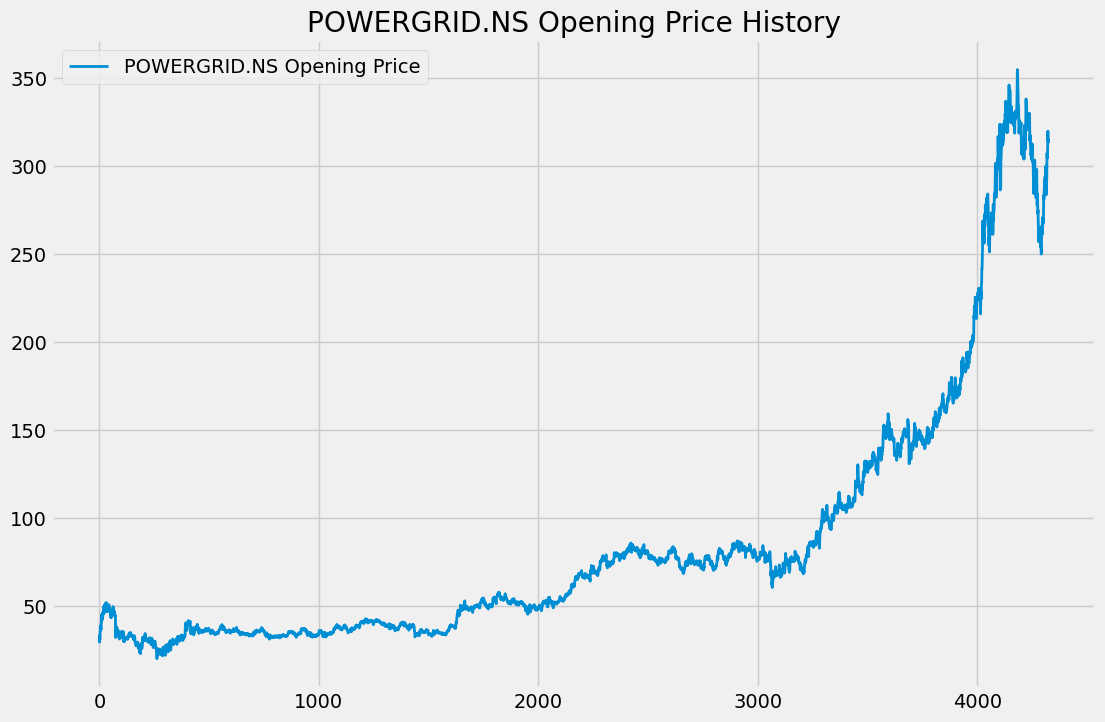

In [30]:
plt.figure(figsize = (12, 8))
plt.title(f'{stock} Opening Price History')
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 2)
#plt.xlabel('Date')
#plt.ylabel('Opening Price USD ($)')
plt.legend()
plt.show()

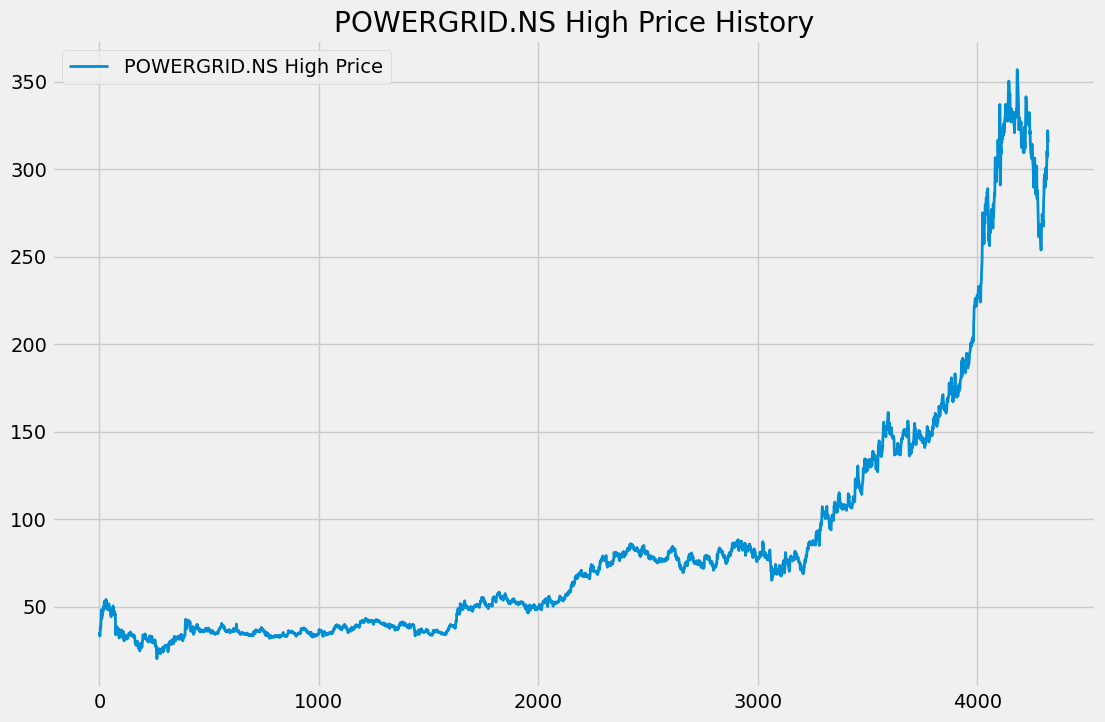

In [27]:
plt.figure(figsize = (12, 8))
plt.title(f'{stock} High Price History')
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 2)
#plt.xlabel('Date')
#plt.ylabel('High Price USD ($)')
plt.legend()
plt.show()

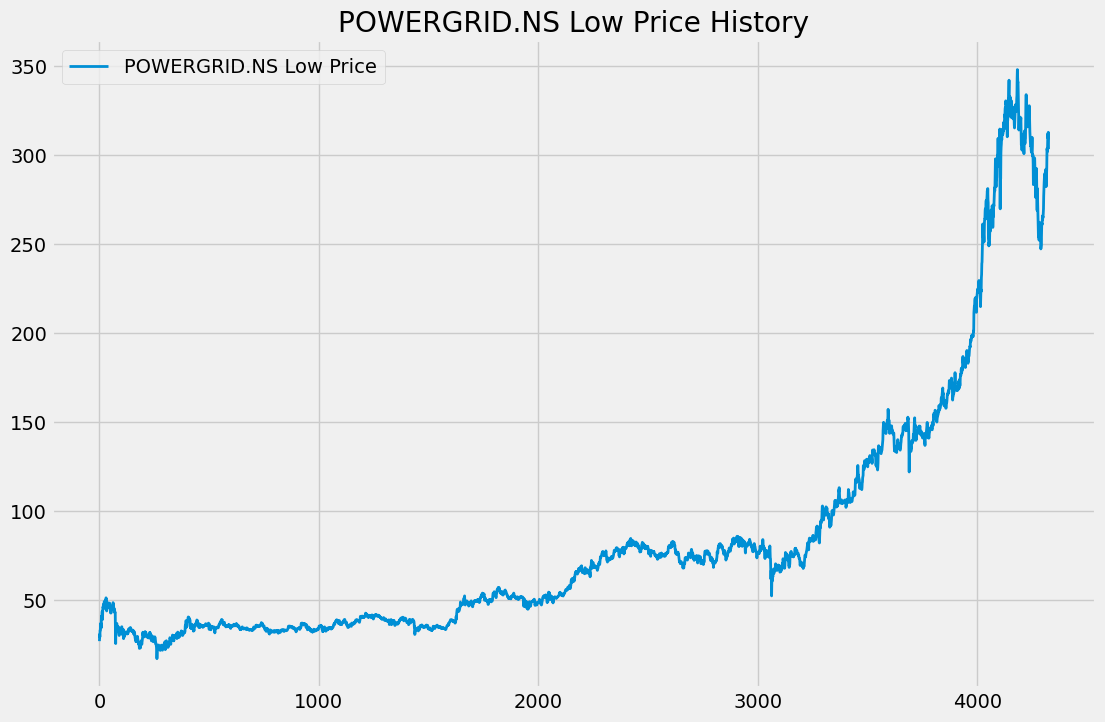

In [31]:
plt.figure(figsize = (12, 8))
plt.title(f'{stock} Low Price History')
plt.plot(df['Low'], label = f'{stock} Low Price', linewidth = 2)
#plt.xlabel('Date')
#plt.ylabel('Low Price USD ($)')
plt.legend()
plt.show()

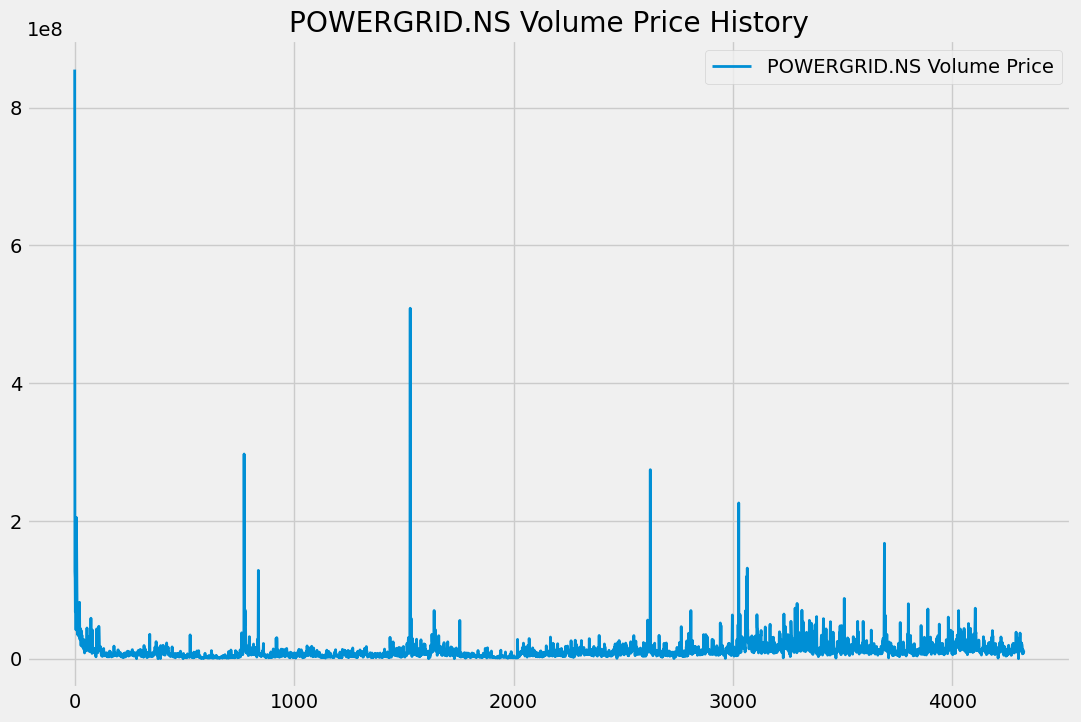

In [29]:
plt.figure(figsize = (12, 8))
plt.title(f'{stock} Volume Price History')
plt.plot(df['Volume'], label = f'{stock} Volume Price', linewidth = 2)
#plt.xlabel('Date')
#plt.ylabel('Volume Price USD ($)')
plt.legend()
plt.show()

In [32]:
#Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[0:5])/5)

30.0


In [33]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [34]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [42]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4321,292.992841
4322,292.730461
4323,292.531125
4324,292.321842


In [43]:
ma200 = df.Close.rolling(200).mean()

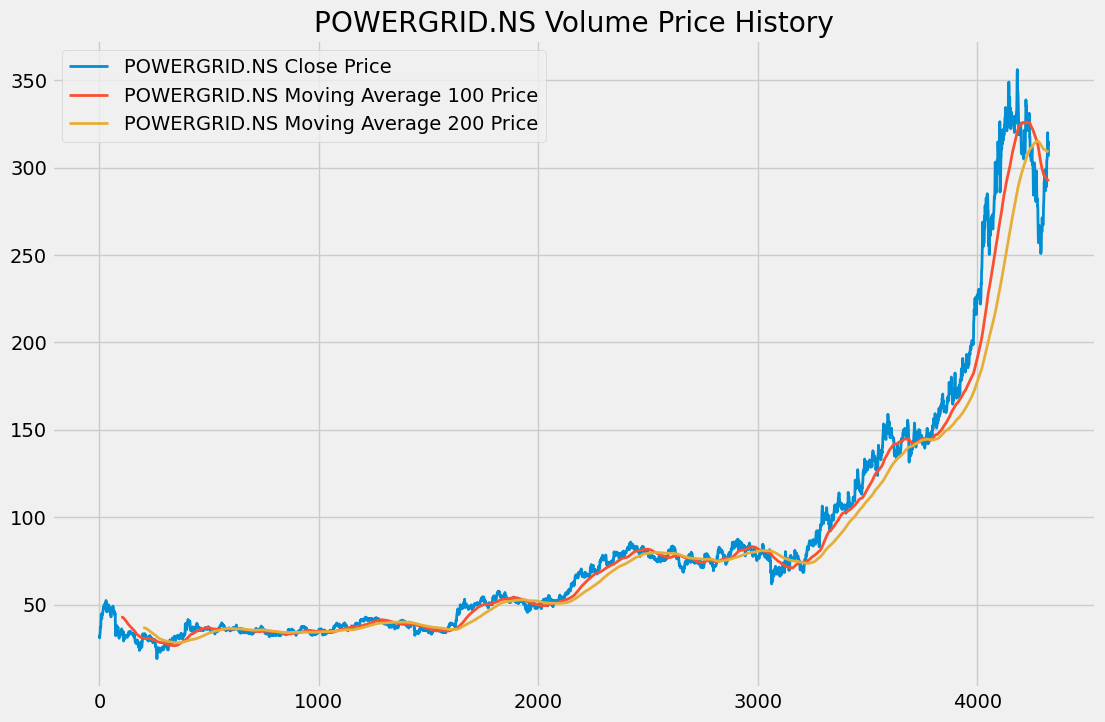

In [60]:
plt.figure(figsize = (12, 8))
plt.title(f'{stock} Volume Price History')
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 2)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 2)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 2)
#plt.xlabel('Date')
#plt.ylabel('Volume Price USD ($)')
plt.legend()
plt.show()

In [56]:
ema100 = df.Close.ewm(span = 100, adjust = False).mean()

In [61]:
ema200 = df['Close'].ewm(span = 200, adjust = False).mean()

In [ ]:
df.pct_change()

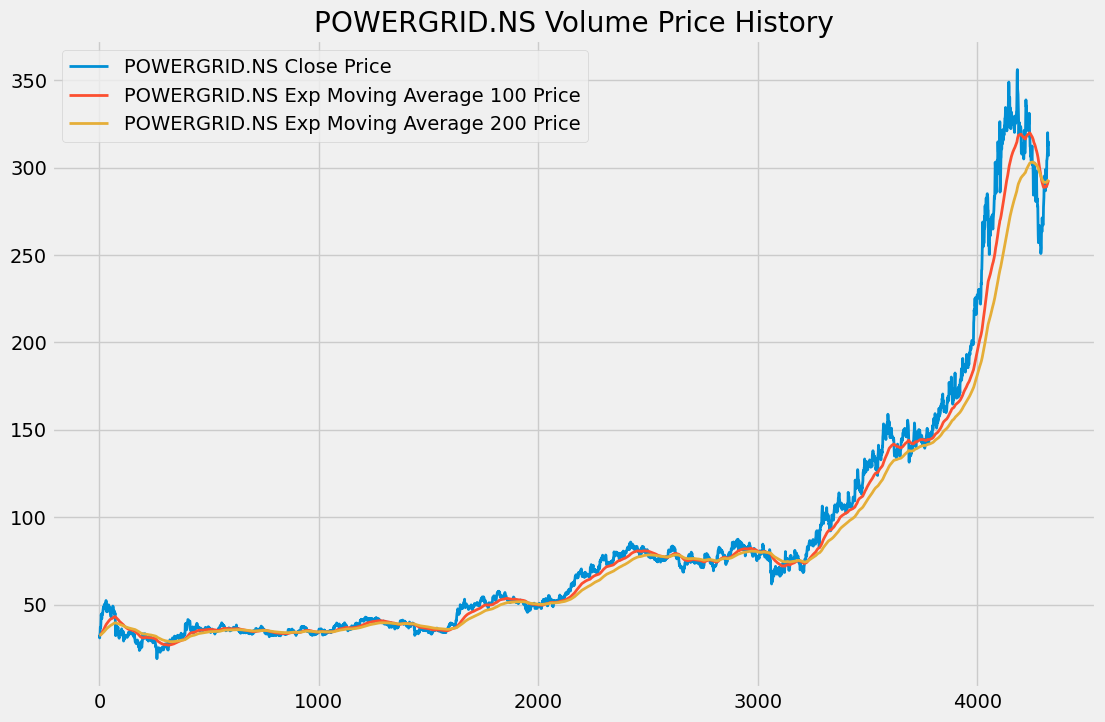

In [62]:
plt.figure(figsize = (12, 8))
plt.title(f'{stock} Volume Price History')
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 2)
plt.plot(ema100, label = f'{stock} Exp Moving Average 100 Price', linewidth = 2)
plt.plot(ema200, label = f'{stock} Exp Moving Average 200 Price', linewidth = 2)
#plt.xlabel('Date')
#plt.ylabel('Volume Price USD ($)')
plt.legend()
plt.show()

In [63]:
# Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [64]:
data_training.shape

(3028, 1)

In [65]:
data_testing.shape

(1298, 1)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [68]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.19808591],
       [0.17371825],
       [0.20447367],
       ...,
       [0.93101039],
       [0.94249218],
       [0.91227645]])

In [69]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [70]:
x_train.shape

(2928, 100, 1)

In [72]:
# Model Building

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 292ms/step - loss: 0.0900
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 292ms/step - loss: 0.0083
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - loss: 0.0076
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 292ms/step - loss: 0.0063
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0057
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 305ms/step - loss: 0.0051
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 317ms/step - loss: 0.0059
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 297ms/step - loss: 0.0061
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0050
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - loss: 0.0043
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 349ms/step - loss: 0.0050
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - loss: 0.0049
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 301ms/step - loss: 0.0044
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 296ms/step - loss: 0.0040
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 

In [76]:
past_100_days = data_training.tail(100)

In [81]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

In [82]:
input_data = scaler.fit_transform(final_df)

In [85]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)


In [86]:
x_test.shape

(1298, 100, 1)

In [88]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step


In [89]:
y_predicted.shape

(1298, 1)

In [90]:
scaler.scale_

array([0.00339719])

In [91]:
scaler_factor = 1 / 0.00339719
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

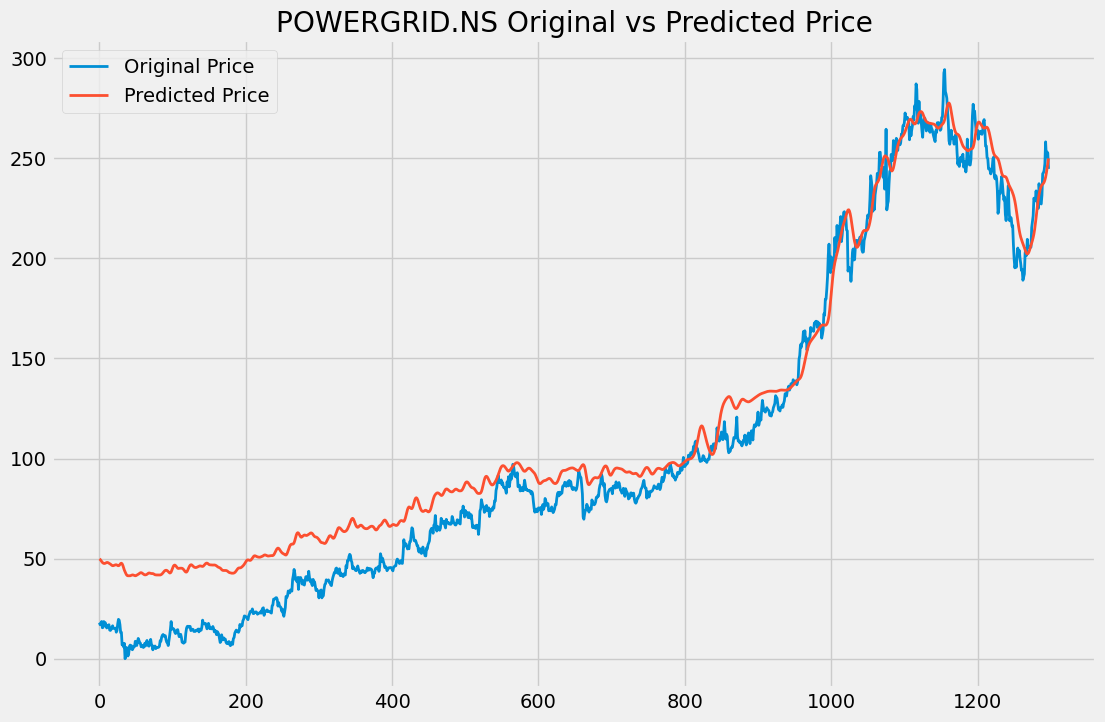

In [95]:
plt.figure(figsize = (12, 8))
plt.title(f'{stock} Original vs Predicted Price')
plt.plot(y_test, label = 'Original Price', linewidth = 2)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 2)
#plt.xlabel('Date')
#plt.ylabel('Volume Price USD ($)')
plt.legend()
plt.show()

In [96]:
model.save('stock_dl_model.h5')